# Insper - Ciência dos Dados#

## Projeto 1: O impacto no desemprego de uma nação ao entrar na OCDE##
-------------------------------------------------------------------------------------------------------------------------------
-------------------------------------------------------------------------------------------------------------------------------

**Aluno: Luiz Felipe Lazzaron**

-------------------------------------------------------------------------------------------------------------------------------
-------------------------------------------------------------------------------------------------------------------------------

## Sumário ##

**Introdução** : a história e o propósito da OCDE.

**Metodologia** : hipósteses e questionamento.

**Código**: programação para os resultados.

**Resultados**: explicando os resultados e análise.

**Conclusão** : observações e suluções de melhorias.

**Referências** : artigos e links relevantes para o projeto.

## Introdução ##

O presente projeto têm por objetivo analisar a influência da empregabilidade de um país ao entrar na OCDE (Organização para a Cooperação e Desenvolvimento Econômico). Em 1947, a instituição que seria renomeada em 1961 por OCDE, foi fundada inicialmente com a função de gestoriar os recursos levantados para a reconstrução da Eupora no período pós-Guerra, produzido pelo Plano Marshal [1]. Posteriormente, o órgão foi se direcionando para o auxiliar das relações econômicas dos países, tendo ,como um de seus propósitos, aumentar o número de empregos das nações  [1]. Desse modo, o estudo vigente visa analisar a efiência da organização supracitada no que diz respeito a formação de empregos. Para isso, analisa-se o crescimento de empregos nos países que passaram a ser membros da OCDE comparando com outros países que não pertecem ao órgão. Ademais, visa-se observar o grau de correlação envolvendo o pertencimento ao órgão com o crescimento da automatização da nação, analisando, por fim, a correlação existente entre empregabilidade e automatização.




## Metodologia ##

Conhecida como organização composta pelos países mais ricos do mundo, a OCDE tem como objetivo estimular a economia e a geração de empregos, sendo um órgão que se preucupa em fazer com que as nações consigam lidar com as mudanças tecnológicas que impactam a vida dos trabalhadores. Uma destas alterações é a automatização. Conforme o próprio órgão,  "a automatização pode conduzir ao
aumento temporário, mas eventualmente prolongado,do desemprego"[2]. Nesse sentido, o trabalho vigente visa analisar a relação existente entre o desemprego e a automatização dos países que estão na OCDE, e se partipar da OCDE faz com que a automatização e o número de empregos aumente ou não. Formalizando, tem-se as seguintes hipóteses:

    - (1) Participar da OCDE deve produzir um decréscimo no desemprego;
    - (2) Deve haver uma relação entre automatização e o aumento do desemprego *em curto prazo*;
 
 
Com base nisso, levantou-se as seguintes perguntas: 
- **(1) Participar da OCDE aumenta ou diminui a taxa de desemprego?**
- **(2) qual é correlação existente entre a automatização com a queda do número de empregos?**



## Código

Para realizar as análises supracitadas, considerou-se analisar o valor percentual da industrialização dos países, bem com o índice de desemprego, ao longo do tempo. Assim, obteve-se, mediante o site GapMinder [3], 

# Importação das Bibliotecas

In [5]:
%matplotlib inline
import pandas as pd
import numpy as np
import math as math
from scipy import stats
import matplotlib.pyplot as plt

# Tabela de Taxa de Desemprego (1947 - 2018)

In [6]:
##Índice de Desemprego em função do tempo
desemprego = pd.read_excel("taxa_de_desemprego.xlsx")
desemprego.set_index('country', inplace=True)

# Adicionando coluna quali e quanti: pertence ou não a OCDE e o ano em que o país passou a integrar a OCDE 

In [7]:
# Dicionário dos Países com o ano que passaram a participar da Organização
dict_members = {'Australia':1971, 'Czech Republic':1995, 'Slovak Republic':1996, 'Austria':1961, 'Belgium':1961, 'Canada':1961, 'Chile':2010, 'South Korea':1996, 'Denmark':1961, 'Slovenia':2010, 'Spain':1961, 'United States':1961, 'Estonia':2010, 'Lithuania':2018, 'Finland':1969, 'France':1961, 'Greece':1961, 'Hungary':1996, 'Ireland':1961, 'Iceland':1961, 'Israel':2010, 'Italy':1961, 'Japan':1964, 'Latvia':2016, 'Luxembourg':1961, 'Mexico':1994, 'Norway':1961, 'New Zealand':1973, 'Netherlands':1961, 'Peru':1961, 'Poland':1996, 'Portugal':1961, 'Switzerland':1961, 'United Kingdom':1961}

#Preparando os dados para serem interpretados como Lista de Anos e lista de Países
list_years_members =[]
for year in dict_members.values():
    list_years_members.append(year)
list_country_members = []
for country in dict_members.keys():
    list_country_members.append(country)
    
#Lista de países da Tabela da Taxa de Desemprego
quali_column = {}
lista_de_paises = []
for pais in desemprego.index:
    lista_de_paises.append(pais)
for country in lista_de_paises:
    if country in list_country_members:
        quali_column[country] = "sim"
    else:
        quali_column[country] = "não"
desemprego["Pertence a OCDE"] = quali_column.values()
#DataFrame com os Membros da OCDE e o Ano de Entrada na Oganização
members = pd.DataFrame(dict_members, index=['entrance']).transpose()
members = pd.DataFrame(index = list_country_members, data ={"entrance":list_years_members})

#Joint com o DataFrame dos Países com as Taxas de Desemprego
paises_desemprego = desemprego.transpose()
paises_desemprego = desemprego.join(members, how='left')

# Selecionando Países para Análise #

Para a realização da análise, optou-se por dividir os países entre membros e não membros da OCDE, além de separar os países que são membros conforme o ano que entraram na organização.
Com base nisso, poderemos analisar a influência de ser membro da organização em relação a automatização e taxa de desemprego.

# Gráfico da média da taxa de desemprego por ano

- Ajuste de Retas

In [8]:
def reta(dados_x, dados_y, c):    
    a = dados_y.cov(dados_x) / dados_x.var()
    b = dados_y.mean() - a*dados_x.mean()

    print('Ajuste linear entre X3 e X4:')
    print('Coeficiente linear:', b)
    print('Coeficiente angular:', a)
    plt.scatter(dados_x, dados_y, c=c, alpha=0.8)
    plt.title('x versus y')
    plt.xlabel('eixo x')
    plt.ylabel('eixo y')

    plt.plot((dados_x.min(), dados_x.max()), (a*dados_x.min()+b, a*dados_x.max()+b), color=c)

    plt.tight_layout()

- Função para destaque do ano de entrada

In [9]:
def reta_vertical(numero,valor_maximo):
    Y = range(0,valor_maximo)
    X = [numero]*len(Y)
    return X,Y

- Gráfico da Média da Taxa de Desemprego de Países que pertencem a OCDE (em azul) versus Países que Não pertencem a OCDE (vermelho)

Text(0.5, 1.0, 'Gráfico da Média da Taxa de Desemprego de Países que pertencem a OCDE (em azul) versus Países que Não pertencem a OCDE (vermelho)')

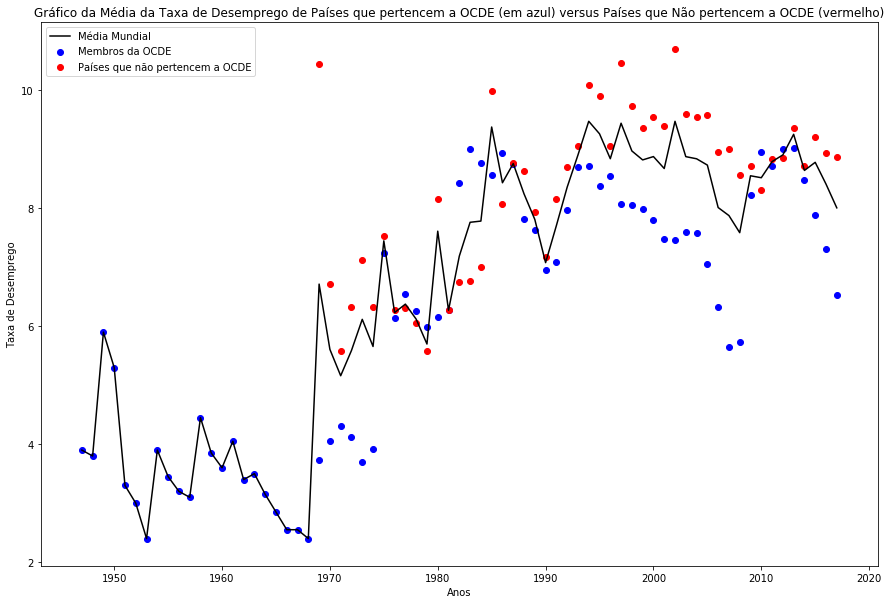

In [10]:
plt.figure(figsize=(15,10))
#Todos os Países
all_country = paises_desemprego.drop("entrance",axis=1)
all_country = all_country.drop("Pertence a OCDE",axis=1)
y = all_country.mean()
x = y.index

plt.plot(x,y, label = "Média Mundial",color='black')
plt.legend()

#Países Que pertecem a Organização
data_members = paises_desemprego[paises_desemprego["Pertence a OCDE"] == "sim"]
data_members = data_members.drop("entrance",axis=1)
data_members = data_members.drop("Pertence a OCDE",axis=1)
y = data_members.mean()
x = y.index

plt.scatter(x,y,label="Membros da OCDE",color='b')
plt.legend()

#Países que não pertencem a organização
data = paises_desemprego[paises_desemprego["Pertence a OCDE"] == "não"]
data = data.drop("entrance",axis=1)
data = data.drop("Pertence a OCDE",axis=1)
y = data.mean()
x = y.index

plt.scatter(x,y,label="Países que não pertencem a OCDE",color = 'r')
plt.legend()
plt.ylabel("Taxa de Desemprego")
plt.xlabel("Anos")
plt.title("Gráfico da Média da Taxa de Desemprego de Países que pertencem a OCDE (em azul) versus Países que Não pertencem a OCDE (vermelho)")

- Gráfico da Média da Taxa de Desemprego dos Países Membros da OCDE ao longo do tempo, separados pelo ano de entrada na Organização 

In [11]:
#Todos os Países
country_data = paises_desemprego.drop("entrance",axis=1)
country_data = country_data.drop("Pertence a OCDE",axis=1)


Text(0.5, 1.0, 'Gráfico da Média da Taxa de Desemprego dos Países Membros da OCDE ao longo do tempo, separados pelo ano de entrada na Organização')

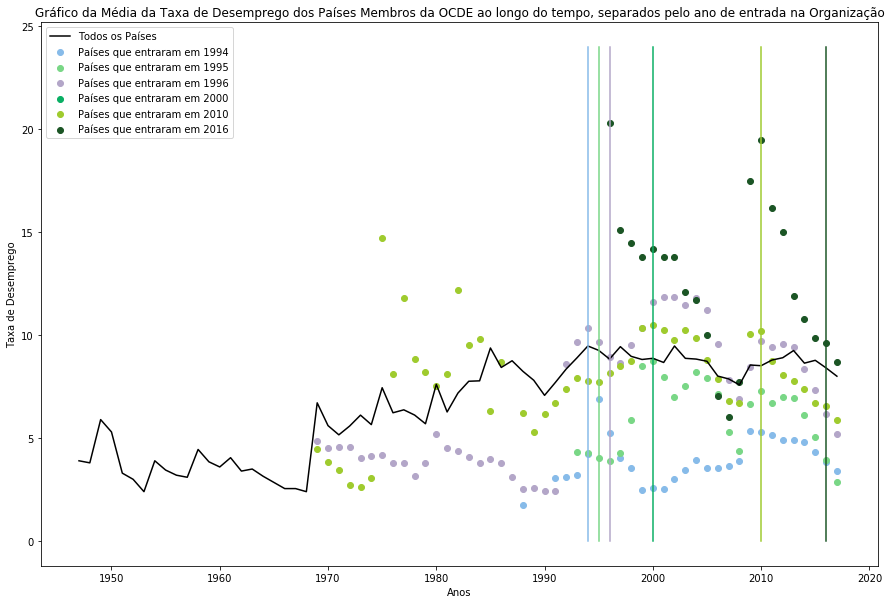

In [12]:
#country_data = country_data.loc[:,range(1990,2018)].dropna()
y = country_data.mean()
x = y.index
plt.figure(figsize=(15,10))
plt.plot(x,y, label = "Todos os Países",color='black')
plt.legend()
#Países que passar a pertencer no ano N
anos_de_entrada = [1994,1995,1996,2000,2010,2016]
for N in anos_de_entrada:
    data = paises_desemprego[paises_desemprego["Pertence a OCDE"] == "sim"]
    data = paises_desemprego[paises_desemprego["entrance"] == N]
    data = data.drop("entrance",axis=1)
    data = data.drop("Pertence a OCDE",axis=1)
   # data = data.loc[:,range(1990,2018)].dropna()
    y = data.mean()
    x = y.index
    clr = np.random.rand(3,)
    maximum = 25
    plt.scatter(x,y, label = "Países que entraram em {}".format(N),color=clr)
    plt.plot(reta_vertical(N,maximum)[0],reta_vertical(N,maximum)[1], color = clr)
    plt.legend()
    
plt.ylabel("Taxa de Desemprego")
plt.xlabel("Anos")
plt.title("Gráfico da Média da Taxa de Desemprego dos Países Membros da OCDE ao longo do tempo, separados pelo ano de entrada na Organização")
    

# Tabela do Valor Econômico da Indústria em percentagem de GDP

- Carregando Tabela

In [13]:
valor_econo= pd.read_excel("industry_percent_of_gdp.xlsx")
valor_econo = valor_econo.set_index('country')

- Adicionando Coluna 

In [14]:
#Lista de países da Tabela da Taxa de Desemprego
quali_column = {}
lista_de_paises = []
for pais in valor_econo.index:
    lista_de_paises.append(pais)
for country in lista_de_paises:
    if country in list_country_members:
        quali_column[country] = "sim"
    else:
        quali_column[country] = "não"
valor_econo["Pertence a OCDE"] = quali_column.values()

- Join com DataFrame de memrbros da OCDE

In [15]:
paises_industria = valor_econo.join(members, how='left')

# Gráfico da média da valor econômico da Indústria por ano

- Gráfico comparando os países pertencentes da OCDE (azul), pelos que não pertencem (vermelho) e a média mundial.

Text(0.5, 1.0, 'Gráfico comparando os países pertencentes da OCDE (azul), pelos que não pertencem (vermelho) e a média mundial')

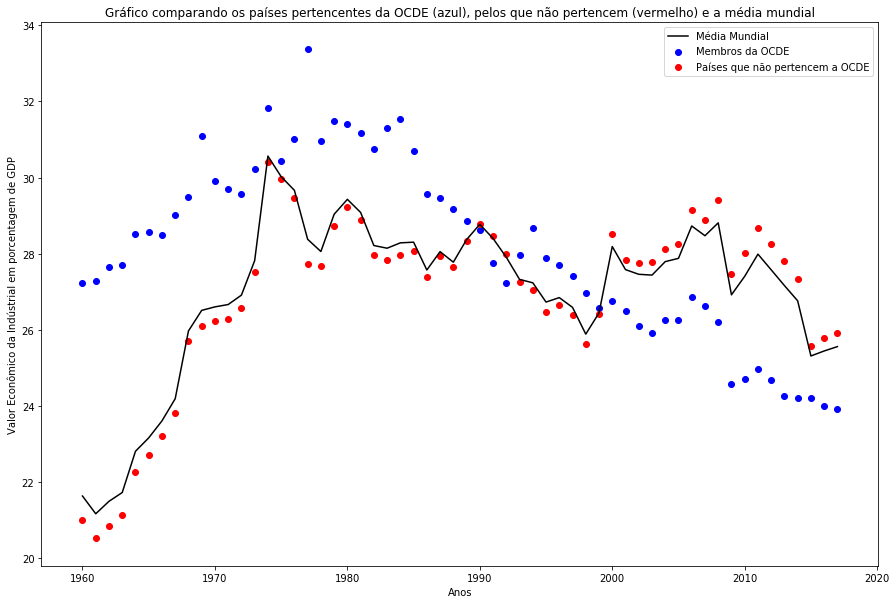

In [16]:
plt.figure(figsize=(15,10))

#Todos os Países
all_country = paises_industria.drop("entrance",axis=1)
all_country = all_country.drop("Pertence a OCDE",axis=1)
y = all_country.mean()
x = y.index
plt.plot(x,y, label = "Média Mundial",color='black')
plt.legend()

#Países Que pertecem a Organização
data_members = paises_industria[paises_industria["Pertence a OCDE"] == "sim"]
data_members = data_members.drop("entrance",axis=1)
data_members = data_members.drop("Pertence a OCDE",axis=1)
y = data_members.mean()
x = y.index

plt.scatter(x,y,label="Membros da OCDE",color='b')
plt.legend()

#Países que não pertencem a organização
data = paises_industria[paises_industria["Pertence a OCDE"] == "não"]
data = data.drop("entrance",axis=1)
data = data.drop("Pertence a OCDE",axis=1)
y = data.mean()
x = y.index

plt.scatter(x,y,label="Países que não pertencem a OCDE",color = 'r')
plt.ylabel("Valor Econômico da Indústrial em porcentagem de GDP")
plt.xlabel("Anos")
plt.legend()
plt.title("Gráfico comparando os países pertencentes da OCDE (azul), pelos que não pertencem (vermelho) e a média mundial")

- Gráfico comparando os países pertencentes da OCDE conforme o ano de entrada na organização

Text(0.5, 1.0, 'Gráfico comparando os países pertencentes da OCDE conforme o ano de entrada na organização')

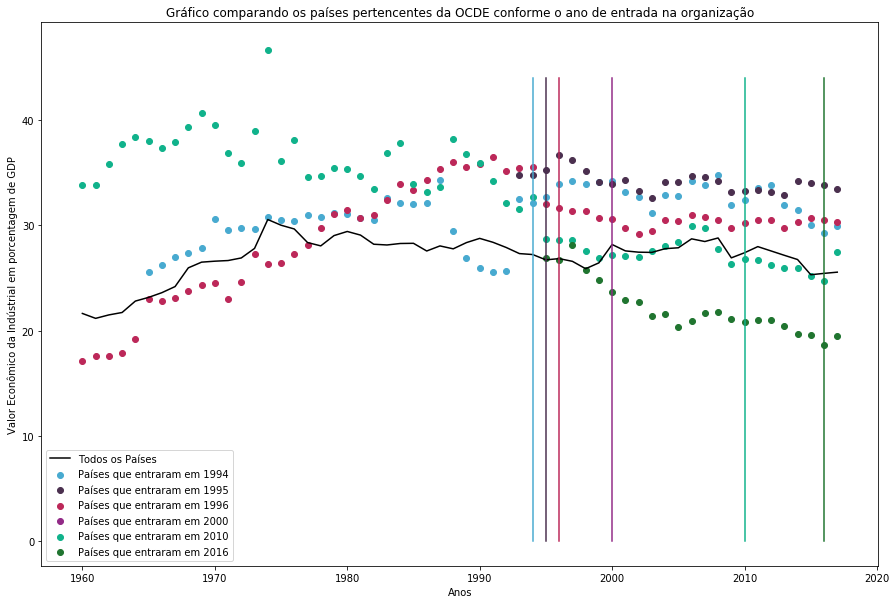

In [17]:
#Todos os Países
country_data = paises_industria.drop("entrance",axis=1)
country_data = country_data.drop("Pertence a OCDE",axis=1)
#paises_industriacountry_data = country_data.loc[:,range(1990,2018)].dropna()
y = country_data.mean()
x = y.index
plt.figure(figsize=(15,10))
plt.plot(x,y, label = "Todos os Países",color='black')
plt.legend()
    
#Países que passar a pertencer no ano N
anos_de_entrada = [1994,1995,1996,2000,2010,2016]
for N in anos_de_entrada:
    data = paises_industria[paises_industria["Pertence a OCDE"] == "sim"]
    data = paises_industria[paises_industria["entrance"] == N]
    data = data.drop("entrance",axis=1)
    data = data.drop("Pertence a OCDE",axis=1)
   # data = data.loc[:,range(1990,2018)].dropna()
    y = data.mean()
    x = y.index
    clr = np.random.rand(3,)
    maximum = 45
    plt.scatter(x,y, label = "Países que entraram em {}".format(N),color=clr)
    plt.plot(reta_vertical(N,maximum)[0],reta_vertical(N,maximum)[1], color = clr)
    plt.legend()

plt.ylabel("Valor Econômico da Indústrial em porcentagem de GDP")
plt.xlabel("Anos")
plt.title("Gráfico comparando os países pertencentes da OCDE conforme o ano de entrada na organização")

# Cruzando Taxa de Desemprego com Valor Econômico da Indústria #

- Dados da Taxa Média de Desemprego entre 1980 a 2018 do Mundo

In [18]:
paises_desemprego_plot = paises_desemprego.loc[:,range(1990,2018)].dropna()

- Dados da Taxa Média de Valor Econômico da Indústria entre 1980 a 2018 do Mundo

In [19]:
paises_industria_plot = paises_industria.loc[:,range(1990,2018)].dropna()

In [20]:
todos_os_paises = list(desemprego.index)
paises_tabela_industria = list(paises_industria_plot.index)
paises_tabela_desemprego = list(paises_desemprego_plot.index)
paises_correlacao = []
for pais in todos_os_paises:
    if pais in paises_tabela_industria and pais in paises_tabela_desemprego:
        paises_correlacao.append(pais)

Ajuste linear entre X3 e X4:
Coeficiente linear: 0.20791545974971193
Coeficiente angular: 0.2746338978571262
Correlação entre X3 e X7: 0.3887644549903392
Covariância entre o Valor Econômico da Indústria em GDP pela Taxa de Desemprego: 0.46340044271676945


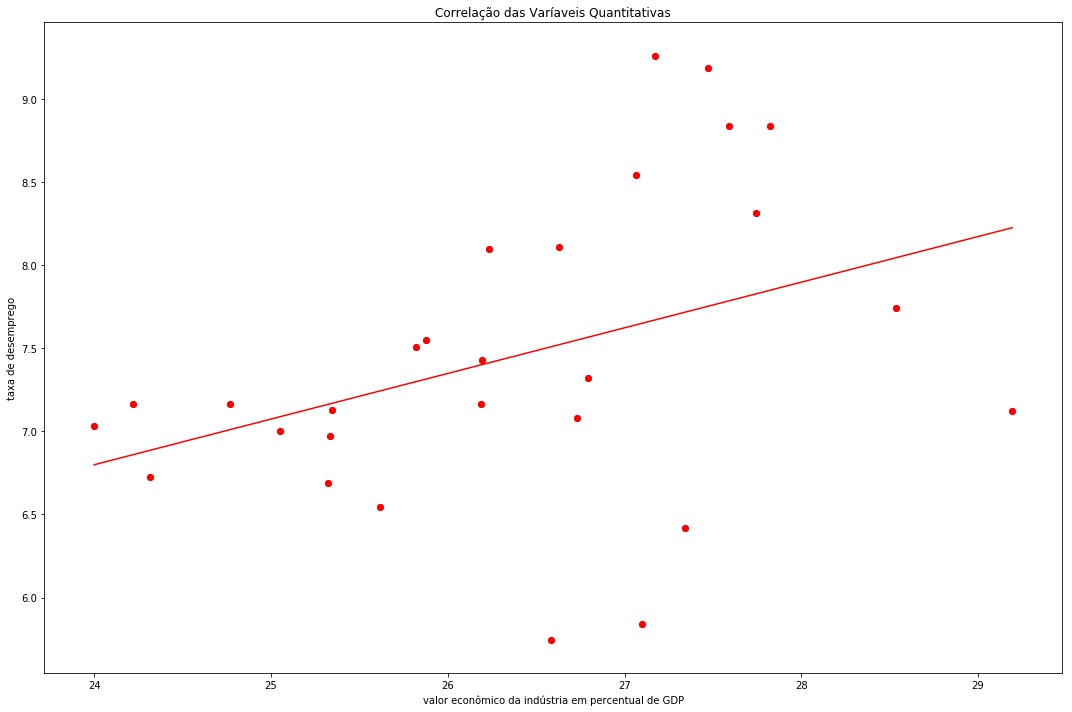

In [21]:
paises_desemprego_plot_tranpose = paises_desemprego_plot.transpose()
paises_industria_plot_tranpose = paises_industria_plot.transpose()

for paises in paises_desemprego_plot_tranpose:
    if paises not in paises_correlacao:
        paises_desemprego_plot_tranpose = paises_desemprego_plot_tranpose.drop(paises, axis=1)
        
for paises in paises_industria_plot_tranpose:
    if paises not in paises_correlacao:
        paises_industria_plot_tranpose = paises_industria_plot_tranpose.drop(paises, axis=1)
        
paises_industria_plot = paises_industria_plot_tranpose.transpose() 
paises_desemprego_plot  = paises_desemprego_plot_tranpose.transpose()

y_1 = paises_industria_plot.mean()
y_2 = paises_desemprego_plot.mean()
x = y_1.index
plt.figure(figsize=(15,10))
plt.scatter(y_1,y_2,color="red" )
reta(y_1,y_2, 'red')
print("Correlação entre X3 e X7:",np.corrcoef(y_1,y_2)[0,1])
print("Covariância entre o Valor Econômico da Indústria em GDP pela Taxa de Desemprego:",np.cov(y_1,y_2)[0,1])
plt.title("Correlação das Varíaveis Quantitativas")
plt.xlabel("valor econômico da indústria em percentual de GDP")
plt.ylabel("taxa de desemprego")
plt.tight_layout()

In [22]:
#nao_membros_OCDE = paises_desemprego[paises_desemprego["Pertence a OCDE"] == "não"]
#nao_membros_OCDE = nao_membros_OCDE.drop("entrance",axis=1)
#nao_membros_OCDE = nao_membros_OCDE.drop("Pertence a OCDE",axis=1)
#plotagem_nao_membros = nao_membros_OCDE.iloc[1]
#plotagem_nao_membros.plot.hist(legend="Pais")

In [23]:
# Taxa de Desemprego dos EUA
#lista_dados_eua = paises_desemprego.loc[:,"United States"]

In [24]:
#dic_dados_eua = dict(lista_dados_eua)
#df = pd.DataFrame(data = , columns=["Year","Tax"])
#dados_eua = pd.DataFrame({'Year' : list(dic_dados_eua.keys()), 'Tax' : list(dic_dados_eua.values())})
#dados_eua.plot.scatter(x='Year',y='Tax')

In [25]:
#dispersao = paises_desemprego.drop("entrance",axis=1)
#dispersao = dispersao.drop("Pertence a OCDE",axis=1)
#dispersao = dispersao.transpose()

In [26]:
#plt.figure(figsize=(30,10))
#for pais in energia_t.columns:
#    plt.scatter(x=energia_t.index, y=energia_t[pais])

## Referências 

Abaixo, tem-se os artigos e publicações utilizados no trabalho a critério de consulta.

[1] Artigo do Wikipédia sobre a Organização. Acesso em https://pt.wikipedia.org/wiki/Organização_para_a_Cooperação_e_Desenvolvimento_Económico

[2] Relatório da OCDE 2018: "Criação de emprego e desenvolvimento económico local 2018: Preparando para o Futuro do trabalho". Acesso em http://www.oecd.org/cfe/leed/PORT_LEED-Flagship-Policy-Highlights.pdf

[3] Fonte de Dados. Acesso em https://www.gapminder.org/tools/